In [209]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [210]:
df = pd.read_csv('weather_data.csv')

In [211]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [212]:
weather_mapping = {
    'Clear': 'Clear',
    'Mainly Clear': 'Clear',
    'Mostly Cloudy': 'Cloudy',
    'Cloudy': 'Cloudy',
    'Haze': 'Fog/Mist',
    'Fog': 'Fog/Mist',
    'Freezing Fog': 'Fog/Mist',

    'Drizzle': 'Rain',
    'Rain': 'Rain',
    'Moderate Rain,Fog': 'Rain',
    'Rain Showers': 'Rain',
    'Rain,Fog': 'Rain',
    'Rain,Haze': 'Rain',
    'Rain Showers,Fog': 'Rain',
    'Rain,Ice Pellets': 'Rain',
    'Rain,Snow': 'Rain',
    'Rain,Snow,Fog': 'Rain',
    'Rain,Snow Grains': 'Rain',
    'Rain,Snow,Ice Pellets': 'Rain',

    'Freezing Drizzle': 'Rain',
    'Freezing Drizzle,Fog': 'Rain',
    'Freezing Drizzle,Haze': 'Rain',
    'Freezing Drizzle,Snow': 'Rain',
    'Freezing Rain': 'Rain',
    'Freezing Rain,Fog': 'Rain',
    'Freezing Rain,Haze': 'Rain',
    'Freezing Rain,Snow Grains': 'Rain',
    'Freezing Rain,Ice Pellets,Fog': 'Rain',

    'Snow': 'Snow',
    'Moderate Snow': 'Snow',
    'Snow Showers': 'Snow',
    'Snow Showers,Fog': 'Snow',
    'Snow,Blowing Snow': 'Snow',
    'Moderate Snow,Blowing Snow': 'Snow',
    'Snow,Fog': 'Snow',
    'Snow,Haze': 'Snow',
    'Snow,Ice Pellets': 'Snow',
    'Snow Pellets': 'Snow',

    'Drizzle,Fog': 'Rain',
    'Drizzle,Ice Pellets,Fog': 'Rain',
    'Drizzle,Snow': 'Rain',
    'Drizzle,Snow,Fog': 'Rain',

    'Thunderstorms': 'Thunderstorms',
    'Thunderstorms,Rain': 'Thunderstorms',
    'Thunderstorms,Rain Showers': 'Thunderstorms',
    'Thunderstorms,Rain Showers,Fog': 'Thunderstorms',
    'Thunderstorms,Rain,Fog': 'Thunderstorms',
    'Thunderstorms,Heavy Rain Showers': 'Thunderstorms',
    'Thunderstorms,Moderate Rain Showers,Fog': 'Thunderstorms',

    'Rain Showers,Snow Showers': 'Rain'
}

# Apply the mapping to the target column
df['Weather'] = df['Weather'].map(weather_mapping)




df.rename(columns={
    'Date/Time': 'Datetime',
    'Temp_C': 'Temperature',
    'Dew Point Temp_C': 'DewPointTemp',
    'Rel Hum_%': 'Humidity',
    'Wind Speed_km/h': 'WindSpeed',
    'Visibility_km': 'Visibility',
    'Press_kPa': 'Pressure',
    'Weather': 'WeatherCondition'
}, inplace=True)

In [213]:
df.head()

,Datetime,Temperature,DewPointTemp,Humidity,WindSpeed,Visibility,Pressure,WeatherCondition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog/Mist
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog/Mist
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,Rain
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,Rain
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog/Mist


In [214]:
#check for null values
df.isnull().sum()

Datetime            0
Temperature         0
DewPointTemp        0
Humidity            0
WindSpeed           0
Visibility          0
Pressure            0
WeatherCondition    0
dtype: int64

In [215]:
label_encoder = LabelEncoder()
df['WeatherCondition_encoded'] = label_encoder.fit_transform(df['WeatherCondition'])

In [216]:
df.head()
df['WeatherCondition_encoded'].unique()

array([2, 3, 1, 0, 4, 5])

In [217]:
features = ['Temperature','DewPointTemp','Visibility','Pressure']
target = 'WeatherCondition_encoded'

In [218]:
X = df[features]
y = df[target]

In [219]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [221]:
model = DecisionTreeClassifier(max_depth=None, class_weight='balanced', random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [222]:
tree_rules = export_text(model, feature_names=features)
rules_lines = tree_rules.splitlines()  # Split rules into lines

print("\nTop 5 Decision Tree Rules:")
for line in rules_lines[:20]:
    print(line)


Top 5 Decision Tree Rules:
|--- DewPointTemp <= 1.39
|   |--- Visibility <= -0.47
|   |   |--- DewPointTemp <= -0.65
|   |   |   |--- Pressure <= 1.67
|   |   |   |   |--- Temperature <= -2.01
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Temperature >  -2.01
|   |   |   |   |   |--- Pressure <= 1.02
|   |   |   |   |   |   |--- Pressure <= -2.73
|   |   |   |   |   |   |   |--- Visibility <= -2.00
|   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- Visibility >  -2.00
|   |   |   |   |   |   |   |   |--- DewPointTemp <= -0.86
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- DewPointTemp >  -0.86
|   |   |   |   |   |   |   |   |   |--- Temperature <= -1.01
|   |   |   |   |   |   |   |   |   |   |--- DewPointTemp <= -0.76
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |   |--- DewPointTemp >  -0.76
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4


In [223]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy: {:.2f}%".format(train_accuracy * 100))


Training Accuracy: 100.00%


In [224]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

Testing Accuracy: 64.83%


Accuracy: 64.83%
Precision: 0.65
Recall: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       665
           1       0.67      0.65      0.66       772
           2       0.54      0.54      0.54        37
           3       0.49      0.47      0.48       161
           4       0.67      0.61      0.64       117
           5       0.00      0.00      0.00         5

    accuracy                           0.65      1757
   macro avg       0.51      0.50      0.50      1757
weighted avg       0.65      0.65      0.65      1757


Confusion Matrix:
[[468 177   2  14   4   0]
 [216 504   0  34  16   2]
 [  0   1  20  12   4   0]
 [ 13  48  13  76  11   0]
 [  3  25   2  16  71   0]
 [  0   1   0   4   0   0]]


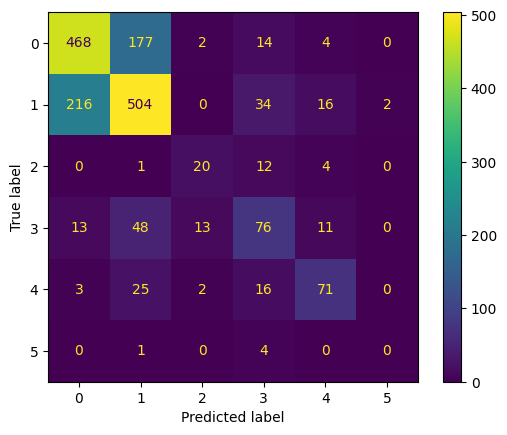

In [225]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision and Recall (weighted for multi-class)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Display Confusion Matrix visually
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
